In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [20]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Display the first few rows of the dataset
print(df.head())

# Check the dataset information
print(df.info())

# Summary statistics
print(df.describe())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [21]:
# Define features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Check for NaN values in target variables
print(f"NaNs in y: {y.isnull().sum()}")

# Remove rows with NaN in target variable
X = X[~y.isnull()]
y = y.dropna()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


NaNs in y: 1


In [22]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [23]:
# Predict on the test set using Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)

# Predict on the test set using Random Forest
y_pred_rf = rf.predict(X_test)

# Classification Report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix for Logistic Regression
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Classification Report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2387
         1.0       0.71      1.00      0.83         5

    accuracy                           1.00      2392
   macro avg       0.86      1.00      0.92      2392
weighted avg       1.00      1.00      1.00      2392

Logistic Regression Confusion Matrix:
[[2385    2]
 [   0    5]]
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2387
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00      2392
   macro avg       1.00      1.00      1.00      2392
weighted avg       1.00      1.00      1.00      2392

Random Forest Confusion Matrix:
[[2387    0]
 [   0    5]]


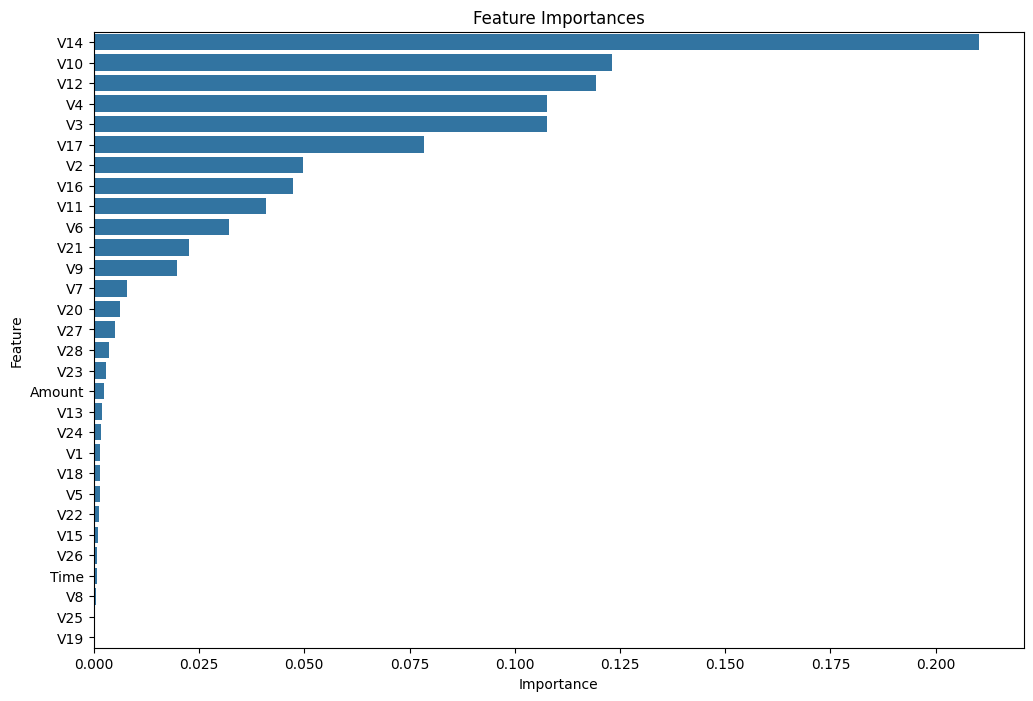

In [24]:
# Feature importance using Random Forest
importances = rf.feature_importances_
features = df.columns[:-1]

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


In [25]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
cv_scores_log_reg = cross_val_score(log_reg, X_train_resampled, y_train_resampled, cv=5)
print(f"Logistic Regression Cross-Validation Scores: {cv_scores_log_reg}")
print(f"Mean Cross-Validation Score: {cv_scores_log_reg.mean()}")

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=5)
print(f"Random Forest Cross-Validation Scores: {cv_scores_rf}")
print(f"Mean Cross-Validation Score: {cv_scores_rf.mean()}")


Logistic Regression Cross-Validation Scores: [0.99955036 0.99955036 0.99955036 1.         0.99955036]
Mean Cross-Validation Score: 0.9996402877697841
Random Forest Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0
